In [ ]:
# pca 主成分分析

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 先用鸢尾花数据演示一下降维 的效果 和对分类准确率的影响
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [6]:
data = iris.data  # 特征值
target =  iris.target  # 目标值

In [8]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

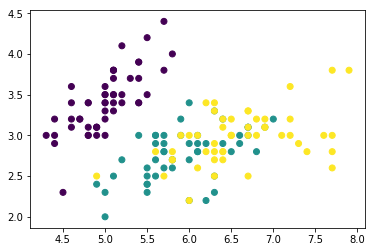

In [11]:
# 绘图
plt.scatter(data[:,0],data[:,1],c=target)

In [12]:
from sklearn.model_selection import train_test_split

In [21]:
# 切分数据集 然后看一下降维之前 knn分类的效果 一会再和 降维后的数据的准确率做一个对比
X_train,X_test,y_train,y_test = train_test_split(data,target)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9736842105263158

In [33]:
# 交叉验证 按照不同的比例去切分训练集和测试集 得到的分数 求平均值

scores = []
for i in [0.1,0.2,0.3]:
    X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=i)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    scores.append(score)
np.array(scores).mean()

0.9814814814814815

In [35]:
def cross_verify(data,target,model):
    scores = []
    for i in [0.1,0.2,0.3]:
        X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=i)
        model.fit(X_train,y_train)
        score = model.score(X_test,y_test)
        scores.append(score)
    return np.array(scores).mean()

In [41]:
cross_verify(data,target,KNeighborsClassifier())

0.9259259259259259

In [37]:
from sklearn.linear_model import LogisticRegression

In [42]:
cross_verify(data,target,LogisticRegression())

0.9703703703703703

In [ ]:
# pca 降维看效果

In [43]:
# decomposition分解
from sklearn.decomposition import PCA

In [44]:
# n_components=None 这个参数 可以是整数 也 可以是小数 整数表示保留几个特征 小数表示保留的比例
pca = PCA(n_components=2)

In [45]:
pca.fit(data)  # 这里只需要特征值 不需要目标值 (lda 既要特征值 也要 目标值 因为要计算各组 直接的做大差异)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [46]:
pca_data = pca.transform(data)  # 转换

In [48]:
pca_data

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

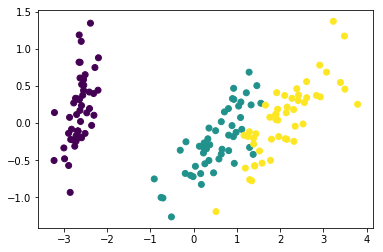

In [50]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=target)

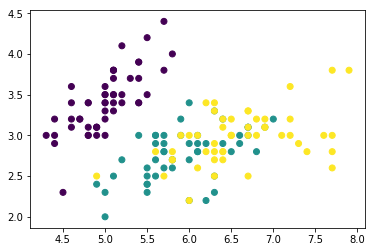

In [51]:
plt.scatter(data[:,0],data[:,1],c=target)

In [58]:
# 这里传入的是 pca降维后的数据
cross_verify(pca_data,target,KNeighborsClassifier())

0.9666666666666667

In [ ]:
# 降低了维度 准确率没有受到太大影响

In [59]:
# LDA discriminant_analysis判别分析
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [60]:
# n_components 指定保留的维度
lda = LinearDiscriminantAnalysis(n_components=2)

In [62]:
lda.fit(data,target)  # lda需要指定分组情况 才能找到各组直接中心距离最大的位置
# 所以 既要传入 特征值 也要 传入 目标值（和pca不同）

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [64]:
lda_data = lda.transform(data)

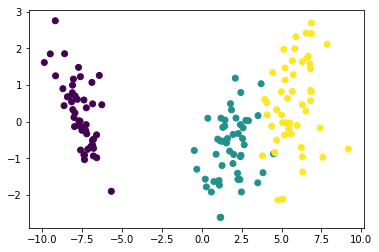

In [66]:
plt.scatter(lda_data[:,0],lda_data[:,1],c=target)

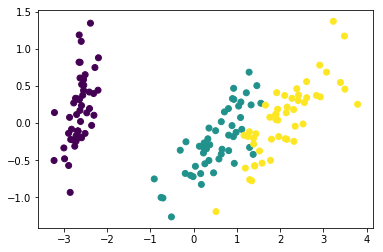

In [67]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=target)

In [73]:
cross_verify(lda_data,target,KNeighborsClassifier())

0.9481481481481482

In [ ]:
# 总之 使用 降维算法 处理的数据 维度降低
# 如果数据量大 时间上会有明显提高
# 分类准确率并没有受到太大影响